In [1]:
import pickle 

In [2]:
with open("5qubit_data/dataset_split.pkl", "rb") as f:
    _, test_dataset = pickle.load(f)

In [8]:
with open("downstream_model_5_step1.pkl", "rb") as f:
    downstream_model_step0 = pickle.load(f)
downstream_model_step0

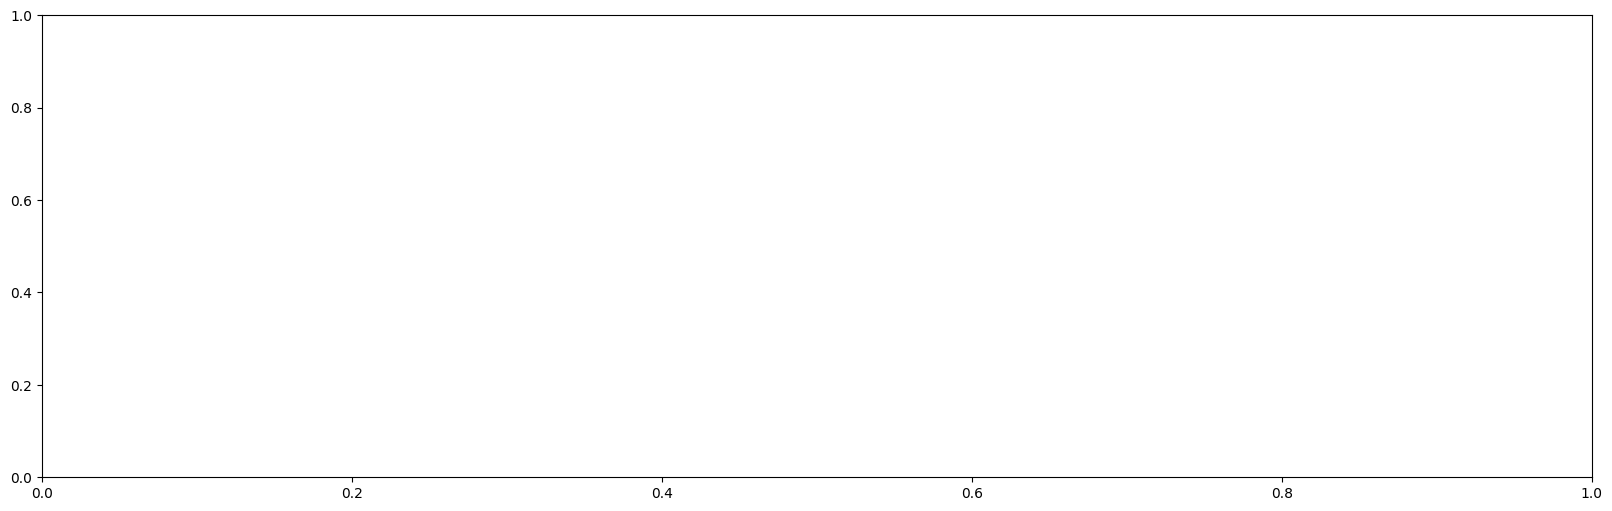

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20,6)) # 创建一个图形对象和一个子图对象

In [ ]:
def get_couple_prop(circuit_info):
    count = 0
    for gate in circuit_info["gates"]:
        if len(gate['qubits']) == 2:
            count += 1
    return count / len(circuit_info["gates"])
    

In [ ]:
import numpy as np 
def get_prop2circuit_infos(dataset, step):
    props = []
    for circuit_info  in dataset :
        props.append(get_couple_prop(circuit_info))
    props = np.array(props)
    
    left, right = 0, step
    prop2circuit_index = []
    prop_X = []
    while right <= 1:
        prop_index = np.where( (props>left)&(props<=right))
        left+= step
        right += step
        if len(prop_index[0]) == 0:
            continue
        prop2circuit_index.append(prop_index)
        prop_X.append(right)
    
    return prop_X, prop2circuit_index

In [ ]:
prop_X, prop2circuit_index = get_prop2circuit_infos(test_dataset,0.1)

In [ ]:

for idx,cir in enumerate(test_dataset):
    cir = downstream_model_step0.upstream_model.vectorize(cir)
    if idx % 100 == 0:
        print(idx,"predict finished!")
    predict = downstream_model_step0.predict_fidelity(cir)
    
from plot.plot import plot_duration_fidelity

for prop_idx in prop2circuit_index:
    prop_test_dataset = np.array(test_dataset)[prop_idx[0]]
    duration_X, duration2circuit_index  = plot_duration_fidelity(fig, axes,prop_test_dataset,1000,18000)
    fig.show()
    fig

0 predict finished!
100 predict finished!
200 predict finished!
300 predict finished!
400 predict finished!
500 predict finished!
600 predict finished!
700 predict finished!
800 predict finished!
900 predict finished!
1000 predict finished!
1100 predict finished!
1200 predict finished!
1300 predict finished!
1400 predict finished!
1500 predict finished!
1600 predict finished!
1700 predict finished!
1800 predict finished!
1900 predict finished!
2000 predict finished!
2100 predict finished!
2200 predict finished!
2300 predict finished!
2400 predict finished!
2500 predict finished!
2600 predict finished!
2700 predict finished!
2800 predict finished!
2900 predict finished!
3000 predict finished!
3100 predict finished!
3200 predict finished!
3300 predict finished!
3400 predict finished!
3500 predict finished!
3600 predict finished!
3700 predict finished!
3800 predict finished!
3900 predict finished!
4000 predict finished!
4100 predict finished!
4200 predict finished!
4300 predict finished!


/home/luliqiang/python-cnn-tools-test/QuCT-Micro2023/plot/plot.py:34: RuntimeWarning: Mean of empty slice.
  real_y.append(reals[circuit_index].mean())
/home/luliqiang/miniconda3/envs/jax-cpu/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/luliqiang/python-cnn-tools-test/QuCT-Micro2023/plot/plot.py:35: RuntimeWarning: Mean of empty slice.
  predict_y.append(predicts[circuit_index].mean())
/home/luliqiang/miniconda3/envs/jax-cpu/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


0 predict finished!
100 predict finished!
200 predict finished!
300 predict finished!
400 predict finished!
500 predict finished!
600 predict finished!
700 predict finished!
800 predict finished!
900 predict finished!
1000 predict finished!
1100 predict finished!
1200 predict finished!
1300 predict finished!
1400 predict finished!
1500 predict finished!
1600 predict finished!
1700 predict finished!
1800 predict finished!
1900 predict finished!
2000 predict finished!
2100 predict finished!
2200 predict finished!
2300 predict finished!
2400 predict finished!
2500 predict finished!
2600 predict finished!
2700 predict finished!
2800 predict finished!
2900 predict finished!
3000 predict finished!
3100 predict finished!
3200 predict finished!
3300 predict finished!
3400 predict finished!
3500 predict finished!
3600 predict finished!
3700 predict finished!
3800 predict finished!
3900 predict finished!
4000 predict finished!
4100 predict finished!
4200 predict finished!
4300 predict finished!


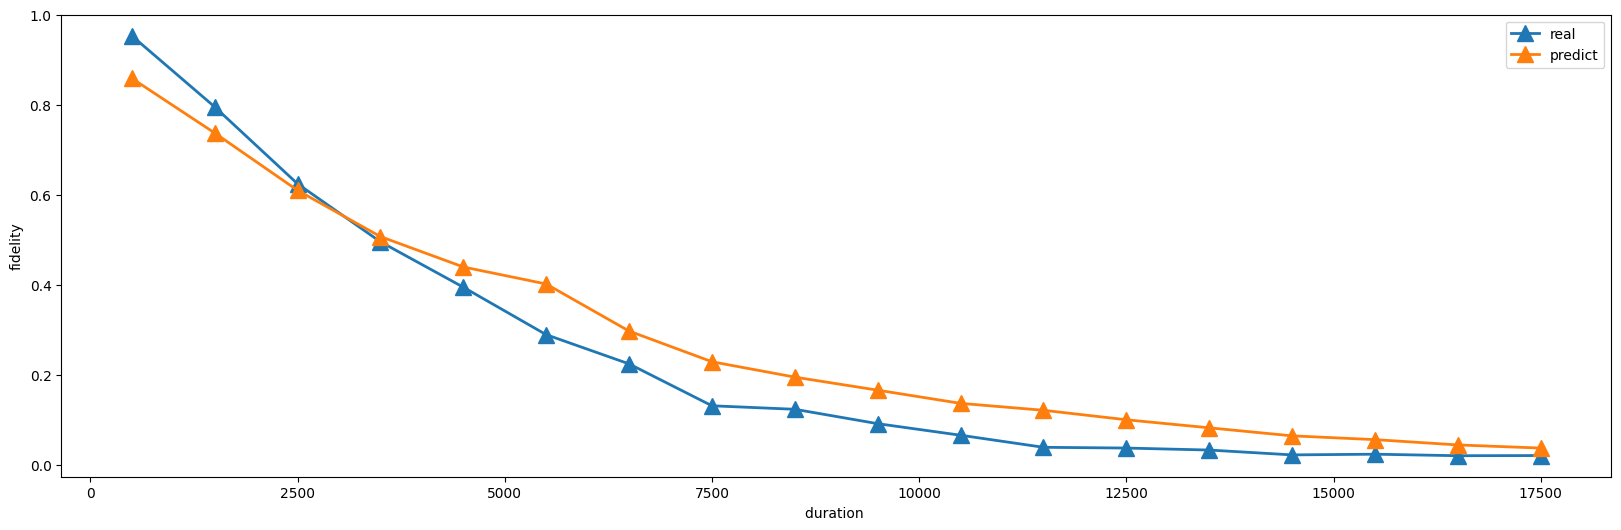

In [ ]:

for idx,cir in enumerate(test_dataset):
    cir = downstream_model_step0.upstream_model.vectorize(cir)
    if idx % 100 == 0:
        print(idx,"predict finished!")
    predict = downstream_model_step0.predict_fidelity(cir)
    
from plot.plot import plot_duration_fidelity

duration_X, duration2circuit_index  = plot_duration_fidelity(fig, axes,test_dataset,1000,18000)
fig.show()
fig

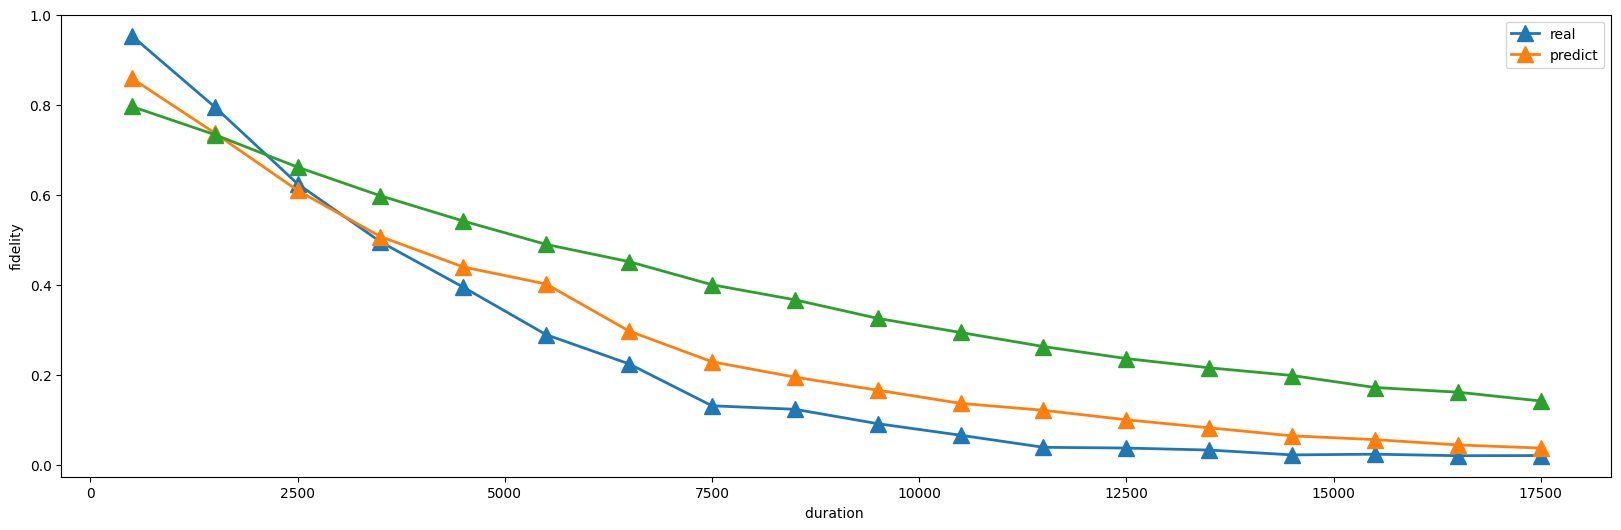

In [ ]:
from circuit.utils import get_xeb_fidelity
xebs = get_xeb_fidelity(test_dataset)
xebs_y = []
for circuit_index in duration2circuit_index:
        xebs_y.append(xebs[circuit_index].mean())
axes.plot(duration_X, xebs_y ,markersize = 12,linewidth = 2, label='xeb',marker = '^' )
fig.savefig("duration_fidelity_step0_xeb.svg")
fig

In [9]:
error_params = downstream_model_step0.error_params
upstream_model = downstream_model_step0.upstream_model
device_index2device = {}
for device  in upstream_model.device2path_table.keys():
    device_index = list(upstream_model.device2path_table.keys()).index(device)
    device_index2device[device_index] = device
device_index2device
import numpy as np 

In [10]:
error_params_path_weight = {}
error_params_path = {}
for idx, device_error_param in enumerate(error_params):
    device = device_index2device[idx]
    sort = np.argsort(device_error_param)
    sort = sort[::-1]
    device_error_params_path_weight = []
    device_error_params_path = []
    for i in sort:
        if int(i) in upstream_model.device2reverse_path_table[device].keys():
            path = upstream_model.device2reverse_path_table[device][int(i)]
            if isinstance(path,str):
                device_error_params_path_weight.append((path, float(device_error_param[i]), downstream_model_step0.path_count[path]))
                device_error_params_path.append(path)
    error_params_path_weight[device] = device_error_params_path_weight
    error_params_path[device] = device_error_params_path

error_params_path_weight

{0: [('rz,0-former-h,1', 0.0, 810),
  ('h,0-former-h,1', 0.0, 1146),
  ('rz,0-former-ry,1', 0.0, 1089),
  ('rz,0-former-h,0', 0.0, 1560),
  ('h,0-former-ry,1', 0.0, 1656),
  ('ry,0-former-ry,1', 0.0, 1068),
  ('ry,0-former-rz,1', 0.0, 1137),
  ('rz,0-former-rx,0', 0.0, 1284),
  ('h,0-former-h,0', 0.0, 2514),
  ('ry,0-former-rz,0', 0.0, 1263),
  ('rz,0-idle3,0', 0.0, 1116),
  ('rx,0-former-ry,0', 0.0, 3642),
  ('ry,0-parallel-ry,1', 0.0, 3972),
  ('rz,0-parallel-ry,1', 0.0, 3867),
  ('rx,0-former-ry,1', 0.0, 5772),
  ('rz,0-former-rz,1', 0.0, 1002),
  ('ry,0-parallel-rz,1', 0.0, 3966),
  ('h,0-former-rz,1', 0.0, 1746),
  ('h,0-former-rz,0', 0.0, 2310),
  ('rz,0-former-rz,0', 0.0, 2046),
  ('rz,0-parallel-h,1', 0.0, 2913),
  ('ry,0-former-ry,0', 0.0, 2217),
  ('ry,0-idle4,0', 0.0, 1311),
  ('h,0-idle4,0', 0.0, 1110),
  ('h,0-parallel-rz,1', 0.0, 3090),
  ('h,0-idle3,0', 0.0, 1104),
  ('rx,0-former-h,0', 0.0, 3153),
  ('ry,0-idle3,0', 0.0, 1215),
  ('rz,0-former-ry,0', 0.0, 1293),
  ('rz,

In [12]:
error_params

Array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
from openpyxl import Workbook
wb = Workbook()


for device, device_error_params_path_weight in  error_params_path_weight.items():
    ws = wb.create_sheet(str(device))
    for row in device_error_params_path_weight:
        ws.append(row)
    
# Save the file
wb.save("sample.xlsx")    